<a href="https://colab.research.google.com/github/uzair011/PyTorch-fndmntl/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
what_we_are_covering = {
    1: "Data (prepare and load).",
    2: "Build model.",
    3: "Fitting the model to data (training).",
    4: "Making predictions and evaluating the model (inference).",
    5: "Saving and loading the model.",
    6: "Putting it all together."
}
what_we_are_covering

{1: 'Data (prepare and load).',
 2: 'Build model.',
 3: 'Fitting the model to data (training).',
 4: 'Making predictions and evaluating the model (inference).',
 5: 'Saving and loading the model.',
 6: 'Putting it all together.'}

In [45]:
import torch
from torch import nn # nn contains all of the building blocks for neural networks.
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.0.1+cu118'

## Data (Preparing and Loading)

* In maching learning data can be almost anything...
  1. Execl spread sheet
  2. Images
  3. Videos
  4. Texts
  5. Audio files
  5. DNA...

   Main Concepts in ML
   1. Get data in to numerical representation.
   2. Build a model to learn patterns in the model.


   * To showcase this, lets create some *KNOWN* data using linear regression formula.
   * Here we'll use a linear regression formula to create straight line with known *parameters*.



In [46]:
# create *known* parameters
weight = 0.8
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10])
print("")
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

tensor([[0.3000],
        [0.3160],
        [0.3320],
        [0.3480],
        [0.3640],
        [0.3800],
        [0.3960],
        [0.4120],
        [0.4280],
        [0.4440]])


In [47]:
len(X), len(y)

(50, 50)

## Splitting data into training and testing sets (one of the core concepts in ML, DL)



In [48]:
# creating a training and test set with our data

train_split = int(0.8 * len(X))
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

Visualizing the data.
explorer's moto :  "Visualize, visualize, visualize....."

In [49]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     prediction=None):
  """Plots trainning data, testing data and compares predictions..."""

  plt.figure(figsize=(10, 7))

  #plot training data into blue
  plt.scatter(train_data, train_labels, c="blue", s=4, label="training dataset")
  #plot testing data into yellow
  plt.scatter(test_data, test_labels, c="purple", s=4, label="testing dataset")

  # are there any predictions?
  if prediction is not None:
    #plot the predictions if they exist
    plt.scatter(test_data, prediction, c="red", s=4, label="predictions")

  # show the legend
  plt.legend(prop={"size": 14})

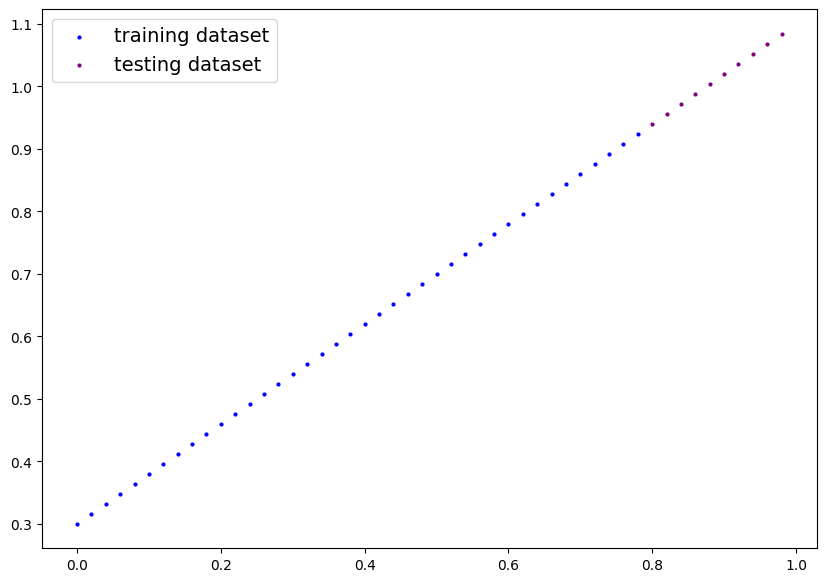

In [50]:
plot_predictions()

## Build a PyTorch Model

- what our model does...
  1. Start with random values (weight, bias)
  2. Look at the training data and try to better represent (or get closer to ) the ideal values ( The weight and bias we used to create the initial data)...

- How does it do so?
1. Radient descent
2. Back propergation

In [51]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))

    # Forward method to define the computation in the method.
  def forward(self, x: torch.Tensor) -> torch.Tensor:    # X is input data - training data.
    return self.weight * X + self.bias     # linear reqression formula.


## PyTorch model building essentials...

* `torch.nn` - Contains all of the buildings for computational graphs (a neural network can be considerd as computational graph.)
* `torch.nn.Parameter` - What parameters our model try and learn, often a pytorch layer from ``torch.nn`` will set these for us.
* `torch.nn.Module` - The base class for all neural networks. if you subclass it, then you should overwrite with def forward()
* `torch.optim` - This is were optimizers in pytorch live, they will help with gradient descent.
* `def forward()` - All `nn.module` subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

### checking the contents of our pytorch model

wer can check our model parameters or what's inside by using `.parameters()`

In [52]:
# Create a random seed
#torch.manual_seed(42)

# Creat an instance of the model (this is a subclass of nn.model)
model_0 = LinearRegressionModel()

# Check out the parameters of the model
list(model_0.parameters())

[Parameter containing:
 tensor([-0.1520], requires_grad=True),
 Parameter containing:
 tensor([0.5478], requires_grad=True)]

In [53]:
model_0.state_dict()

OrderedDict([('weight', tensor([-0.1520])), ('bias', tensor([0.5478]))])

In [54]:
weight, bias

(0.8, 0.3)

### Making predictions with `torch.inference_mode()`

To check our model's predictive power, lets check how it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [59]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9400],
         [0.9560],
         [0.9720],
         [0.9880],
         [1.0040],
         [1.0200],
         [1.0360],
         [1.0520],
         [1.0680],
         [1.0840]]))

In [60]:
# Make predictions with our model
with torch.inference_mode():
  y_predict = model_0(x_test)

y_predict

tensor([[0.5478],
        [0.5448],
        [0.5418],
        [0.5387],
        [0.5357],
        [0.5326],
        [0.5296],
        [0.5266],
        [0.5235],
        [0.5205],
        [0.5174],
        [0.5144],
        [0.5114],
        [0.5083],
        [0.5053],
        [0.5022],
        [0.4992],
        [0.4962],
        [0.4931],
        [0.4901],
        [0.4870],
        [0.4840],
        [0.4810],
        [0.4779],
        [0.4749],
        [0.4718],
        [0.4688],
        [0.4657],
        [0.4627],
        [0.4597],
        [0.4566],
        [0.4536],
        [0.4505],
        [0.4475],
        [0.4445],
        [0.4414],
        [0.4384],
        [0.4353],
        [0.4323],
        [0.4293],
        [0.4262],
        [0.4232],
        [0.4201],
        [0.4171],
        [0.4141],
        [0.4110],
        [0.4080],
        [0.4049],
        [0.4019],
        [0.3989]])

In [57]:
y_test

tensor([[0.9400],
        [0.9560],
        [0.9720],
        [0.9880],
        [1.0040],
        [1.0200],
        [1.0360],
        [1.0520],
        [1.0680],
        [1.0840]])

ValueError: ignored

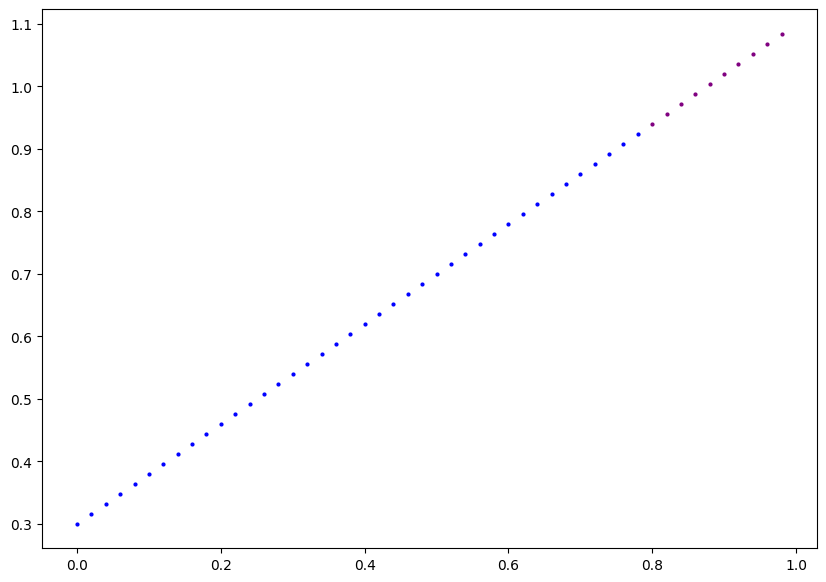

In [58]:
plot_predictions(prediction=y_predict)